In [40]:
!pip install yfinance

In [55]:
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline  
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings(action='ignore')

In [42]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [43]:
df.shape

(2731, 6)

In [44]:
df=df[:][1500:]

In [45]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-26,6468.439941,6498.290039,6449.609863,6474.750000,6474.750000,3306050000
2018-10-27,6480.839844,6507.410156,6453.529785,6480.379883,6480.379883,3393250000
2018-10-28,6482.660156,6502.279785,6447.910156,6486.390137,6486.390137,3445190000
2018-10-29,6492.350098,6503.600098,6306.990234,6332.629883,6332.629883,4199910000
2018-10-30,6337.040039,6364.990234,6310.140137,6334.270020,6334.270020,3781100000
...,...,...,...,...,...,...
2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450
2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902
2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,38062.039062,28546143503


[]

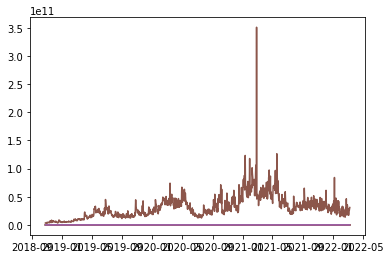

In [46]:
import matplotlib.pyplot as plt

plt.plot(df.index, df)
plt.plot()

In [47]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,22057.332356,22634.533034,21418.540590,22079.048889,22079.048889,3.053363e+10
std,19059.681407,19572.918657,18455.413259,19053.579322,19053.579322,2.049631e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,3.306050e+09
25%,7898.507812,8082.462646,7679.100342,7910.579834,7910.579834,1.747658e+10
50%,10578.198242,10777.696289,10313.092773,10583.134766,10583.134766,2.703978e+10
75%,39195.742188,40459.427734,37685.607422,39205.355469,39205.355469,3.923296e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [58]:
rolling_mean= df[:]['Adj Close'].rolling(window=12).mean()
rolling_std= df[:]['Adj Close'].rolling(window=12).std()
print(rolling_mean)
print(rolling_std)

Date
2018-10-26             NaN
2018-10-27             NaN
2018-10-28             NaN
2018-10-29             NaN
2018-10-30             NaN
                  ...     
2022-03-05    40200.527344
2022-03-06    40211.690430
2022-03-07    40275.479492
2022-03-08    40309.201172
2022-03-10    40438.153971
Name: Adj Close, Length: 1231, dtype: float64
Date
2018-10-26            NaN
2018-10-27            NaN
2018-10-28            NaN
2018-10-29            NaN
2018-10-30            NaN
                 ...     
2022-03-05    2538.427938
2022-03-06    2529.522197
2022-03-07    2457.965810
2022-03-08    2431.521315
2022-03-10    2409.100824
Name: Adj Close, Length: 1231, dtype: float64


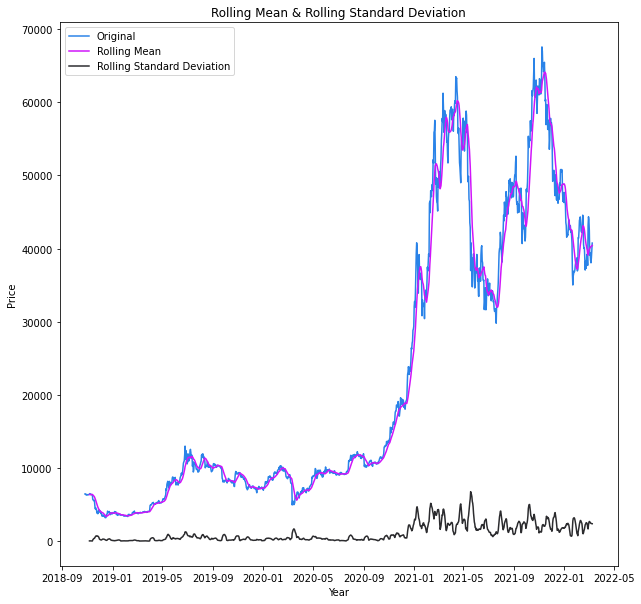

In [59]:
plt.figure(figsize=(10,10))
plt.plot(df[:]['Adj Close'], color = '#2a83e8', label = 'Original')
plt.plot(rolling_mean, color = '#d014fa', label = 'Rolling Mean')
plt.plot(rolling_std, color = '#2b2b2e', label = 'Rolling Standard Deviation')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Price') 
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [60]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
result = adfuller(df[:]['Adj Close'], autolag='AIC')
result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result[4].items():
    result_output['Critical Value (%s)'%key] = value    
print(result_output)

Results of Dickey Fuller Test:
Test Statistic                   -0.989377
p-value                           0.757119
#Lags Used                       20.000000
Number of Observations Used    1210.000000
Critical Value (1%)              -3.435766
Critical Value (5%)              -2.863932
Critical Value (10%)             -2.568043
dtype: float64


The ADF statistics are far from critical and the p-value is greater than the threshold (0,05). Therefore, we can conclude that the time series is not stationary.

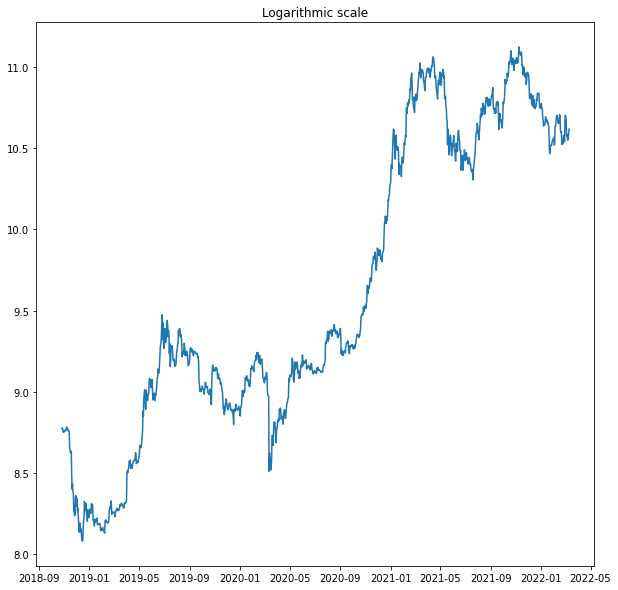

In [65]:
btc_log = np.log(df[:]['Adj Close'])
plt.figure(figsize=(10,10))
plt.title('Logarithmic scale')
plt.plot(btc_log)
plt.show()

In [97]:
btc_log

Date
2018-10-26     8.775665
2018-10-27     8.776534
2018-10-28     8.777461
2018-10-29     8.753471
2018-10-30     8.753730
                ...    
2022-03-05    10.581536
2022-03-06    10.556333
2022-03-07    10.546973
2022-03-08    10.564557
2022-03-10    10.615497
Name: Adj Close, Length: 1231, dtype: float64

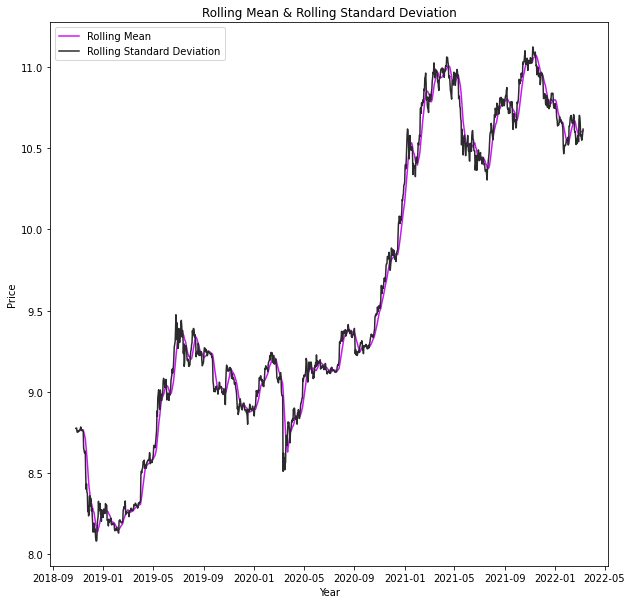

In [66]:
rolling_moving_average_btc_log= btc_log.rolling(window=12).mean()

plt.figure(figsize=(10,10))
#plt.plot(rolling_moving_average_btc_log, color = '#2a83e8', label = 'Original')
plt.plot(rolling_moving_average_btc_log, color = '#d014fa', label = 'Rolling Mean')
plt.plot(btc_log, color = '#2b2b2e', label = 'Rolling Standard Deviation')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Price') 
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [71]:
btc_log_Minus_Moving_Average=btc_log-rolling_moving_average_btc_log
btc_log_Minus_Moving_Average.isnull()

#Remove NaN values
btc_log_Minus_Moving_Average.dropna(inplace=True)
btc_log_Minus_Moving_Average

Date
2018-11-06    0.009396
2018-11-07    0.019329
2018-11-08    0.007901
2018-11-09   -0.001403
2018-11-10    0.001285
                ...   
2022-03-05   -0.018311
2022-03-06   -0.043805
2022-03-07   -0.054858
2022-03-08   -0.038149
2022-03-10    0.009566
Name: Adj Close, Length: 1220, dtype: float64

In [82]:
def test_stationarity(timeseries):
    
    # rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    plt.figure(figsize=(35,10))
    original = plt.plot(timeseries, color='#2a83e8', label='Original')
    mean = plt.plot(movingAverage, color='#d014fa', label='Rolling Mean')
    std = plt.plot(movingSTD, color='#2b2b2e', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('\nResults of Dickey Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    result_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        result_output['Critical Value (%s)'%key] = value
    print(result_output)

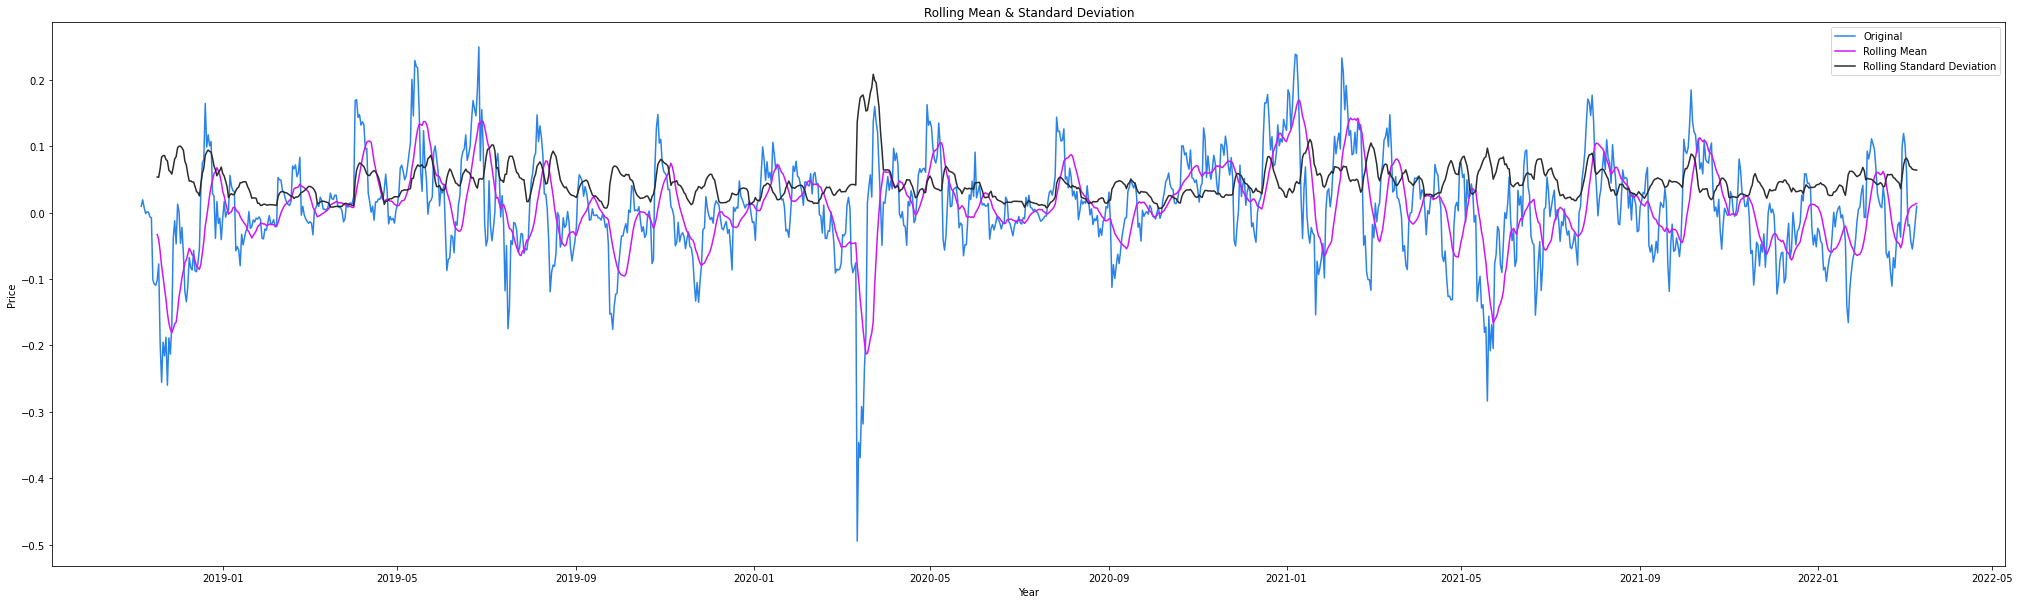


Results of Dickey Fuller Test:
Test Statistic                -9.765749e+00
p-value                        7.357907e-17
#Lags Used                     4.000000e+00
Number of Observations Used    1.215000e+03
Critical Value (1%)           -3.435744e+00
Critical Value (5%)           -2.863922e+00
Critical Value (10%)          -2.568038e+00
dtype: float64


In [83]:
test_stationarity(btc_log_Minus_Moving_Average)

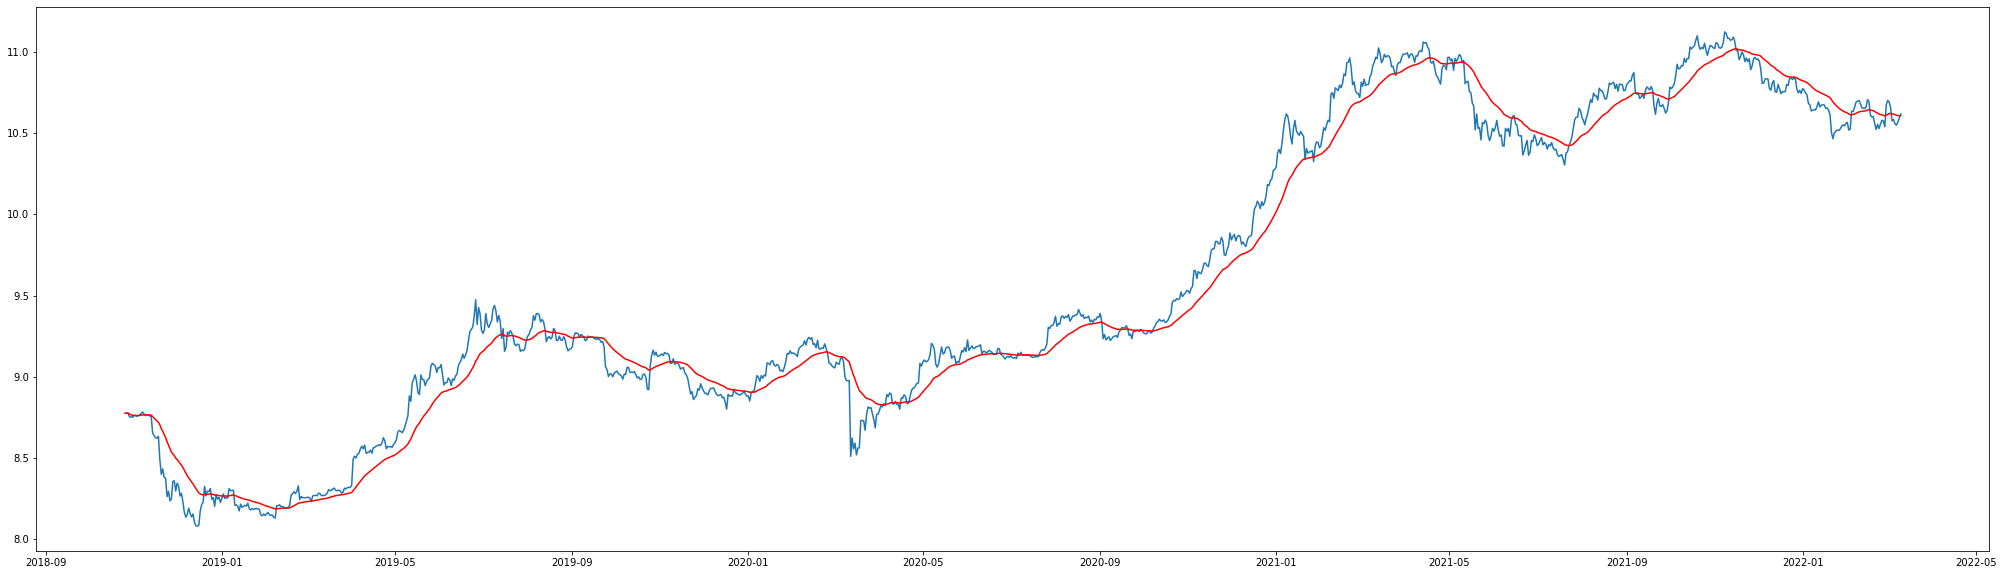

In [85]:
exponentialDecayWeightedAverage = btc_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.figure(figsize=(35,10))
plt.plot(btc_log)
plt.plot(exponentialDecayWeightedAverage, color='red')
plt.show()

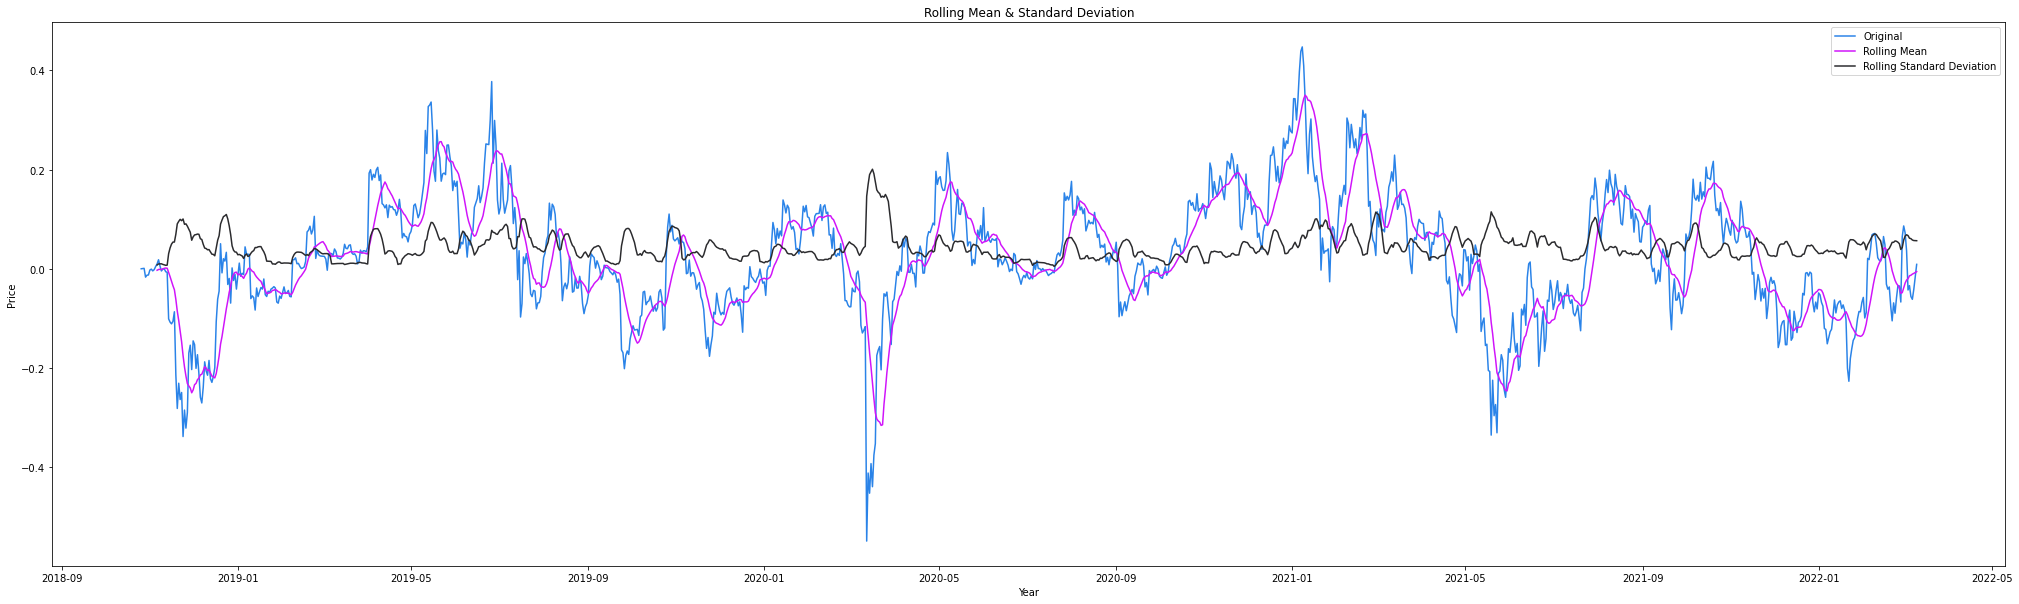


Results of Dickey Fuller Test:
Test Statistic                   -5.104047
p-value                           0.000014
#Lags Used                        1.000000
Number of Observations Used    1229.000000
Critical Value (1%)              -3.435682
Critical Value (5%)              -2.863895
Critical Value (10%)             -2.568024
dtype: float64


In [86]:
btcLogMinusExponentialMovingAverage = btc_log - exponentialDecayWeightedAverage
test_stationarity(btcLogMinusExponentialMovingAverage)

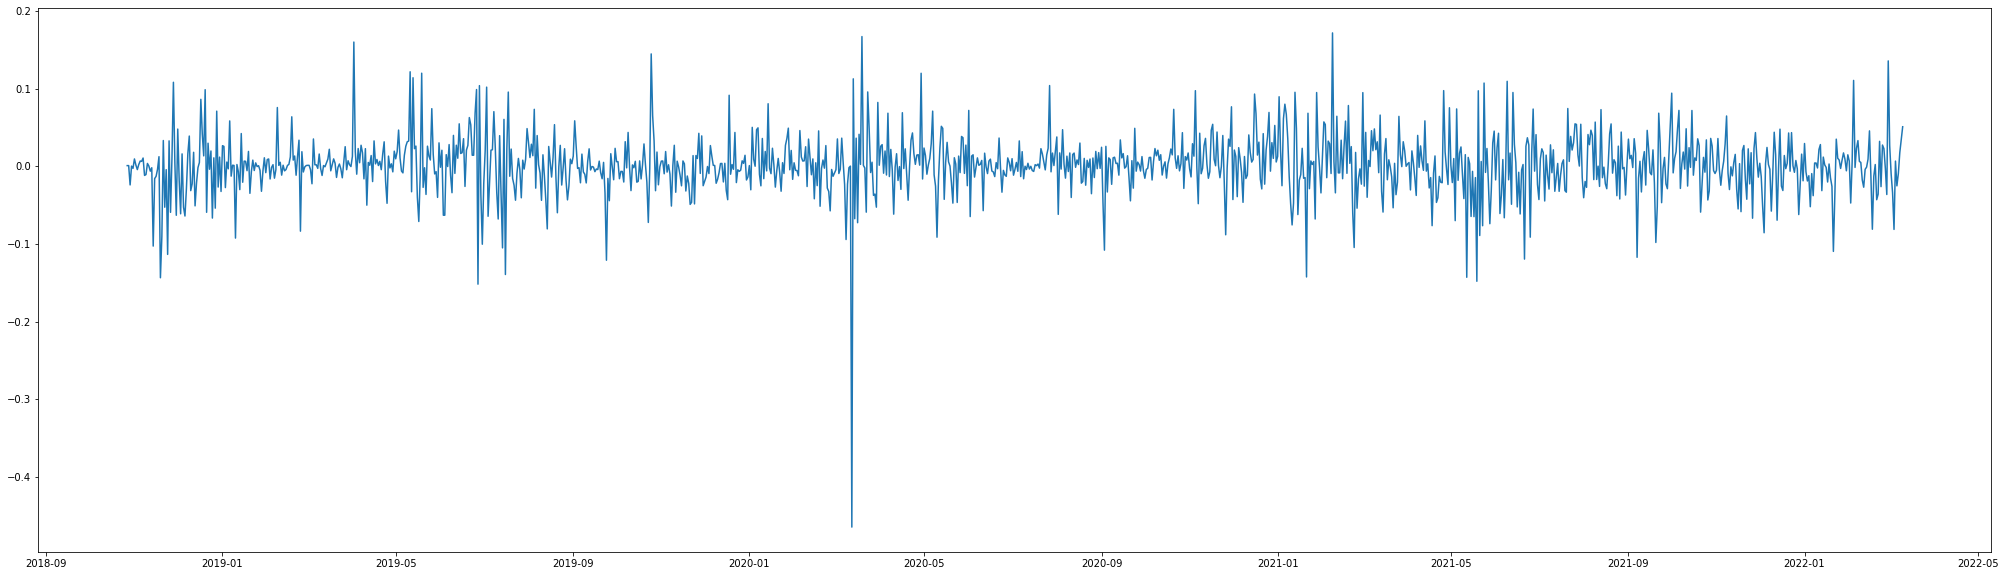

In [88]:
btcLogDiffShifting = btc_log - btc_log.shift()
plt.figure(figsize=(35,10))
plt.plot(btcLogDiffShifting)
plt.show()

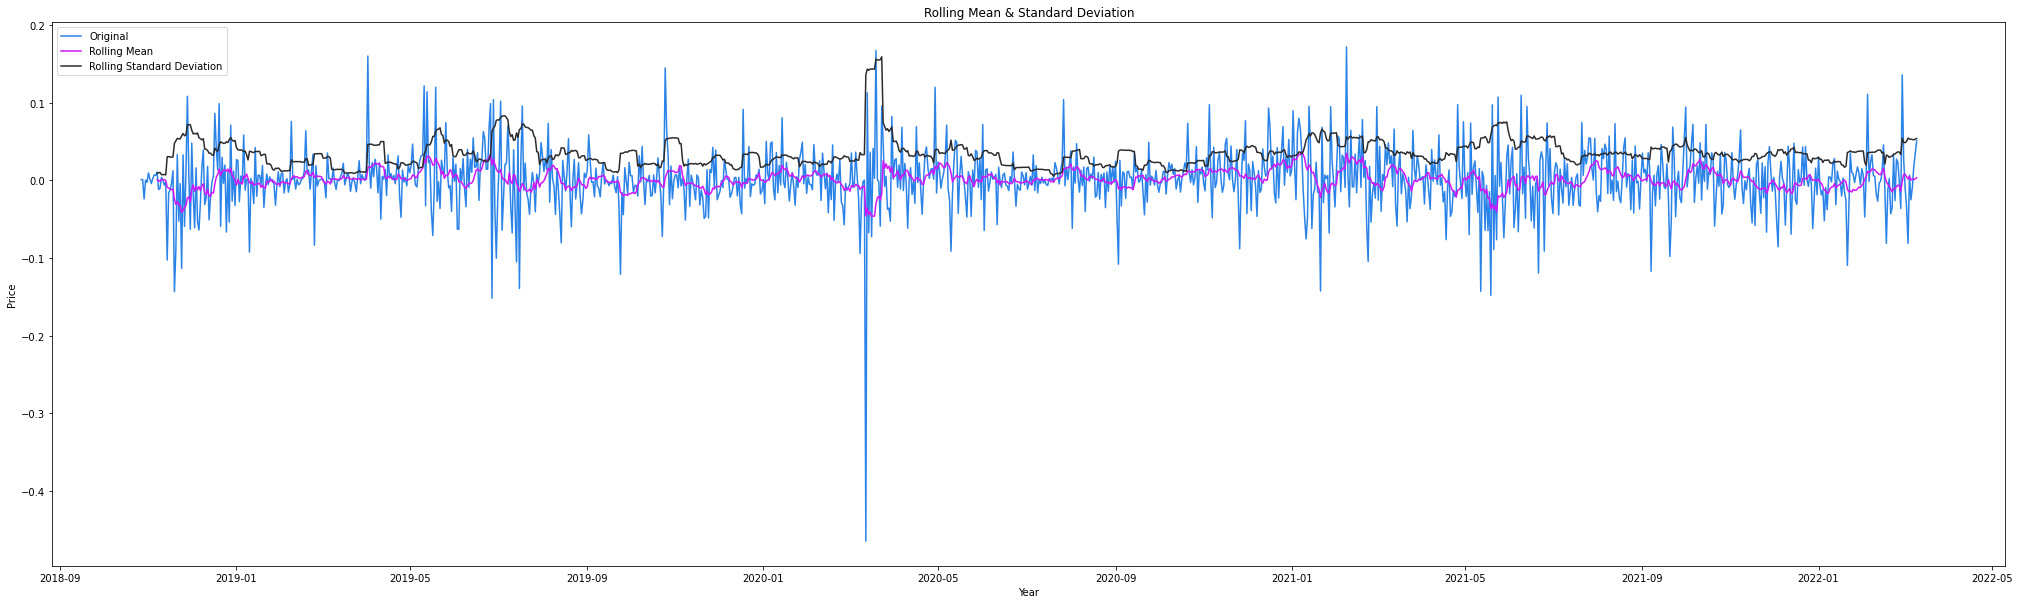


Results of Dickey Fuller Test:
Test Statistic                -1.634085e+01
p-value                        2.996955e-29
#Lags Used                     3.000000e+00
Number of Observations Used    1.226000e+03
Critical Value (1%)           -3.435695e+00
Critical Value (5%)           -2.863900e+00
Critical Value (10%)          -2.568027e+00
dtype: float64


In [92]:
btcLogDiffShifting.dropna(inplace=True)
test_stationarity(btcLogDiffShifting)

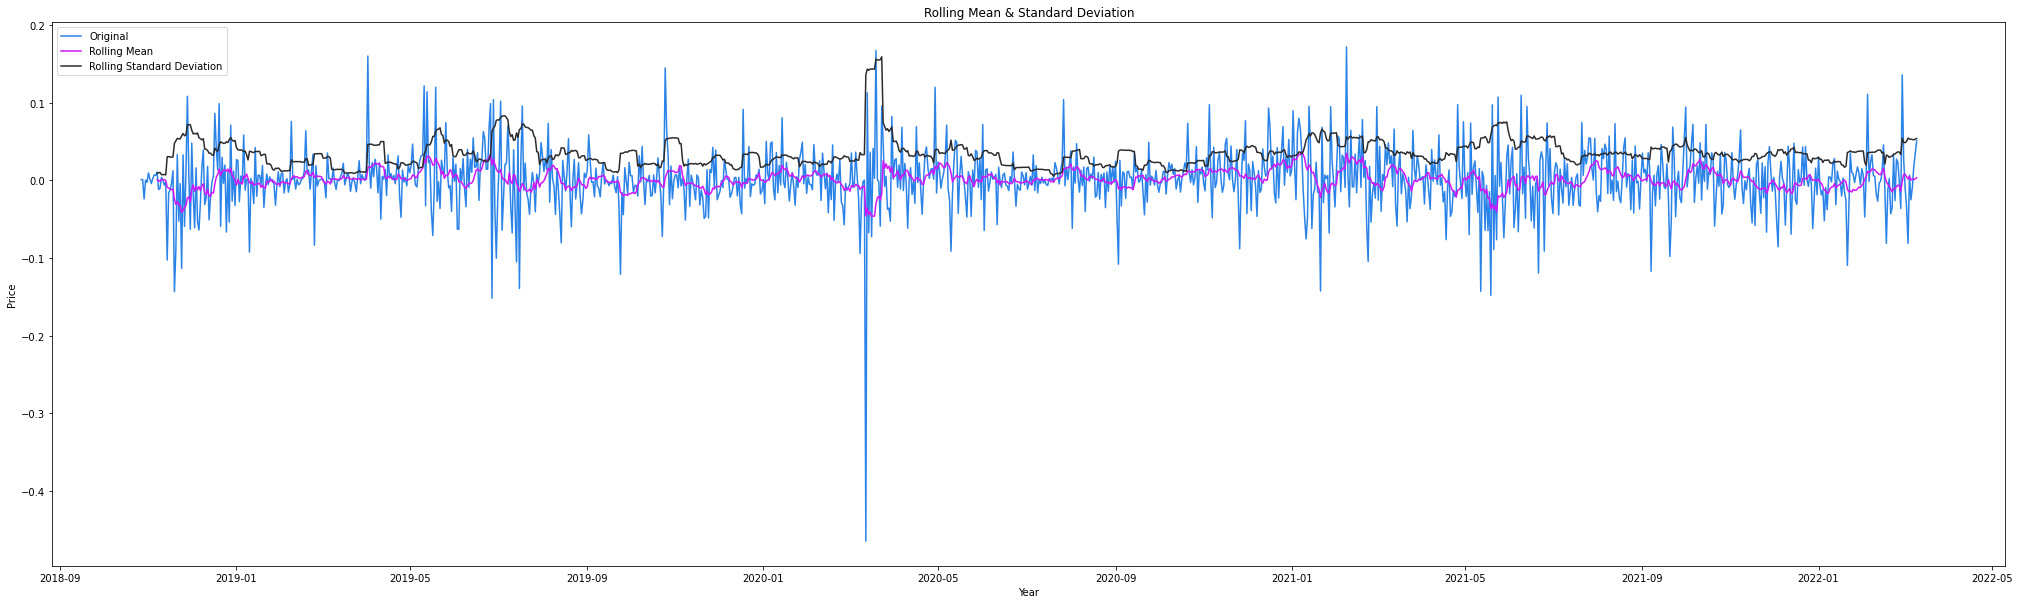


Results of Dickey Fuller Test:
Test Statistic                -1.634085e+01
p-value                        2.996955e-29
#Lags Used                     3.000000e+00
Number of Observations Used    1.226000e+03
Critical Value (1%)           -3.435695e+00
Critical Value (5%)           -2.863900e+00
Critical Value (10%)          -2.568027e+00
dtype: float64


In [100]:
btcLogDiffShifting.dropna(inplace=True)
test_stationarity(btcLogDiffShifting)

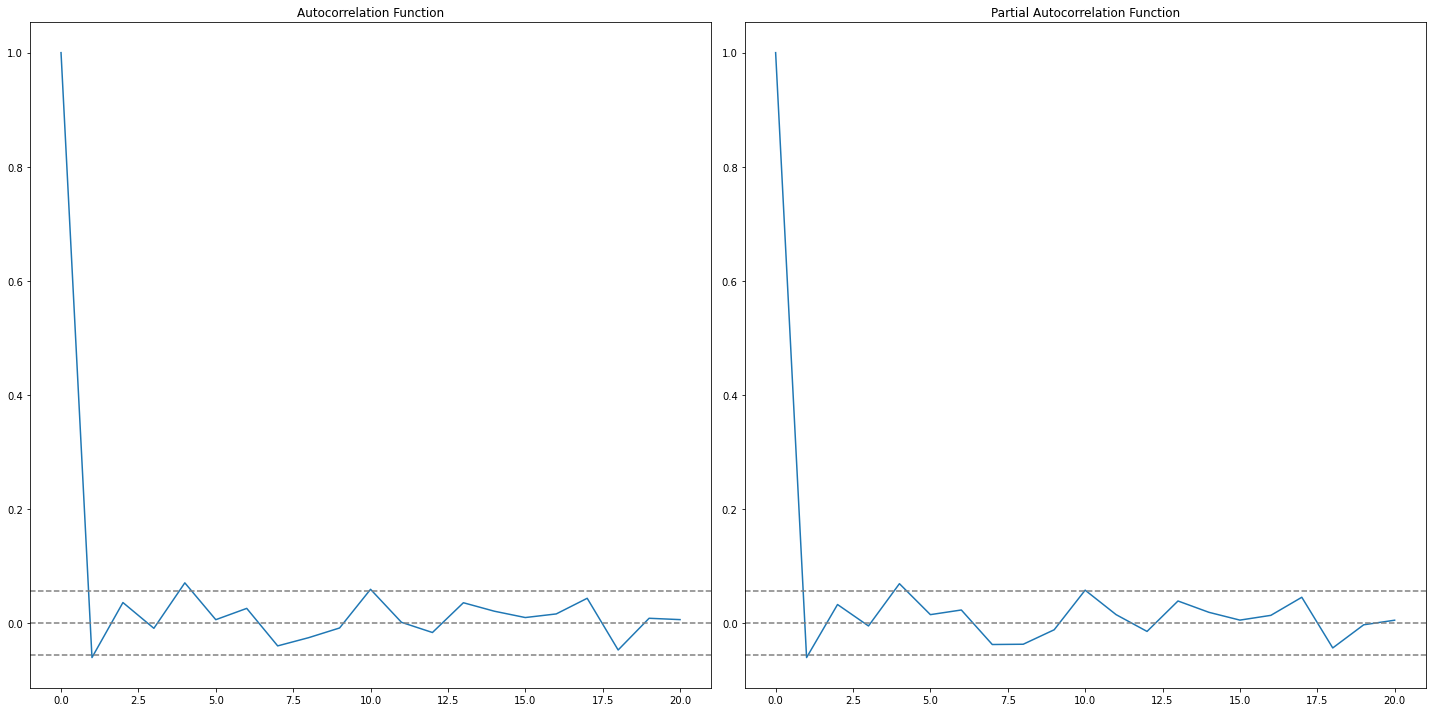

In [105]:
#ACF & PACF plots
lag_acf = acf(btcLogDiffShifting, nlags=20)
lag_pacf = pacf(btcLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(btcLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(btcLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(btcLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(btcLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

Plotting AR model


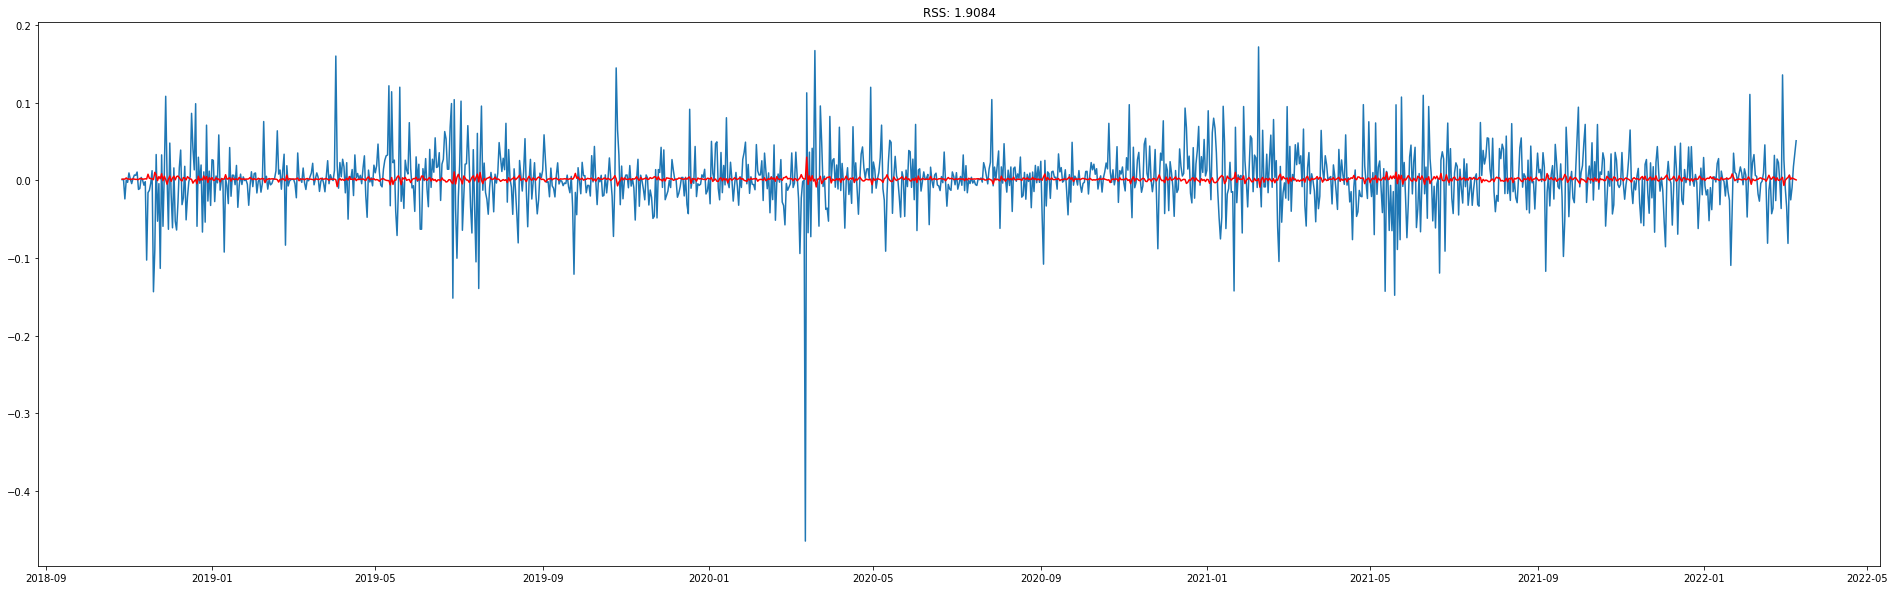

In [111]:
#AR Model
#acf=1, pacf=1
model = ARIMA(btc_log, order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(33,10))
plt.plot(btcLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - btcLogDiffShifting)**2))
print('Plotting AR model')

Plotting AR model


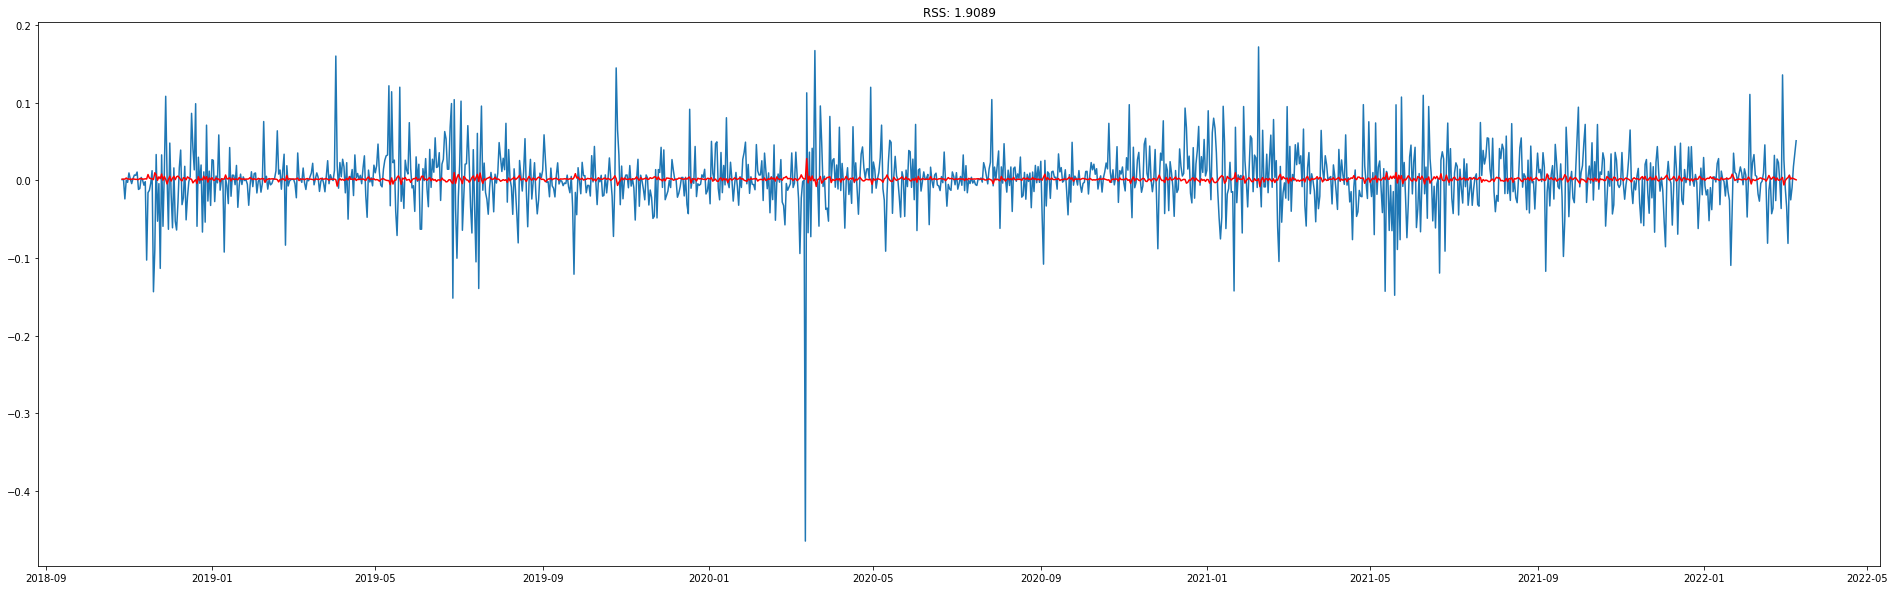

In [113]:
#AR Model
#acf=1, pacf=1
model = ARIMA(btc_log, order=(0,1,1))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(33,10))
plt.plot(btcLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - btcLogDiffShifting)**2))
print('Plotting AR model')

Plotting AR model


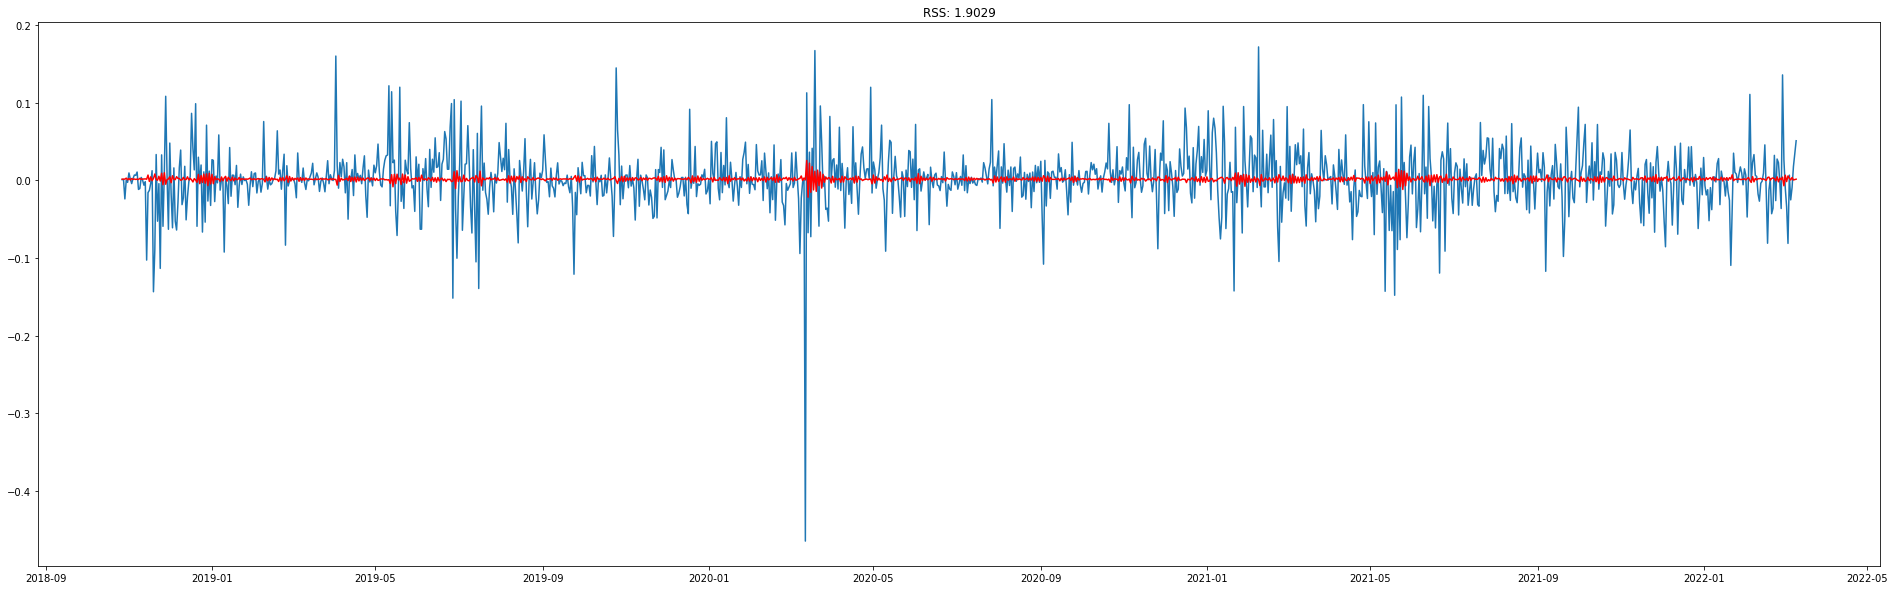

In [115]:
#AR Model
#acf=1, pacf=1
model = ARIMA(btc_log, order=(1,1,1))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(33,10))
plt.plot(btcLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - btcLogDiffShifting)**2))
print('Plotting AR model')

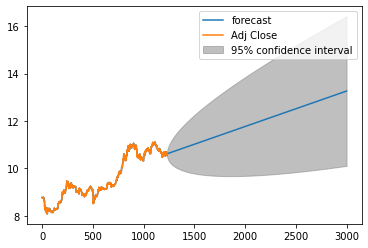

In [120]:
results_AR.plot_predict(1,3000)
plt.show()

In [37]:
#Train Test split
to_row = int(len(df)*0.9)
training_data=list(df[:to_row]['Adj Close'])
training_data
testing_data=list(df[to_row:]['Adj Close'])

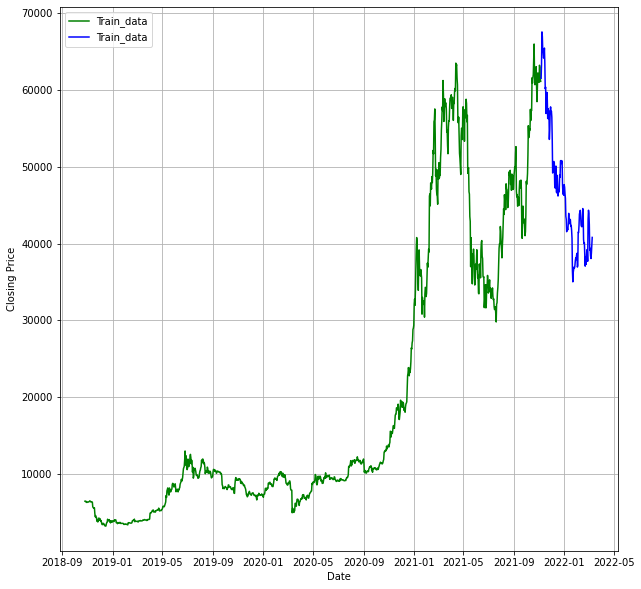

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df[:to_row]['Adj Close'],'green',label='Train_data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Train_data')
plt.legend()

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
model_prediction=[]
for i in range(len(testing_data)):
  model=ARIMA(training_data, order=(4,1,0))
  model_fit=model.fit()
  output= model_fit.forecast()
  yhat=output[0]
  model_prediction.append(yhat)
  actual_test_value=testing_data[i]
  #print(actual_test_value)
  training_data.append(actual_test_value)

In [25]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2730
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22058.396
Date:                Wed, 09 Mar 2022   AIC                          44126.791
Time:                        15:06:27   BIC                          44156.350
Sample:                             0   HQIC                         44137.475
                               - 2730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0201      0.010     -2.087      0.037      -0.039      -0.001
ar.L2         -0.0043      0.009     -0.471      0.638      -0.022       0.013
ar.L3          0.0112      0.010      1.155      0.2

In [26]:
date_range=df[to_row:]
date_range.index

DatetimeIndex(['2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18',
               ...
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09'],
              dtype='datetime64[ns]', name='Date', length=274, freq=None)

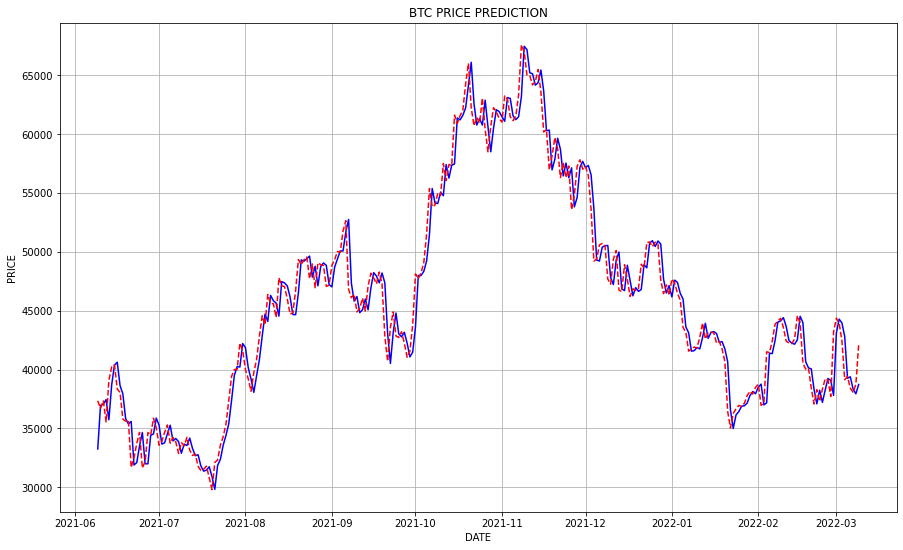

In [27]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range=df[to_row:].index

plt.plot(date_range, model_prediction[:], color='blue', linestyle='-', label="BTC PREDICTED PRICE")
plt.plot(date_range, testing_data, color='red', linestyle='dashed', label="BTC PREDICTED PRICE")

plt.title("BTC PRICE PREDICTION")
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.show()

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(training_data, order=(0,1,1))
model_fit=model.fit()
output= model_fit.forecast()
print(int(output[0]))

42017


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3004
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -24686.852
Date:                Wed, 09 Mar 2022   AIC                          49377.703
Time:                        15:10:55   BIC                          49389.718
Sample:                             0   HQIC                         49382.025
                               - 3004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0056      0.010     -0.537      0.591      -0.026       0.015
sigma2      8.101e+05   7666.022    105.674      0.000    7.95e+05    8.25e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

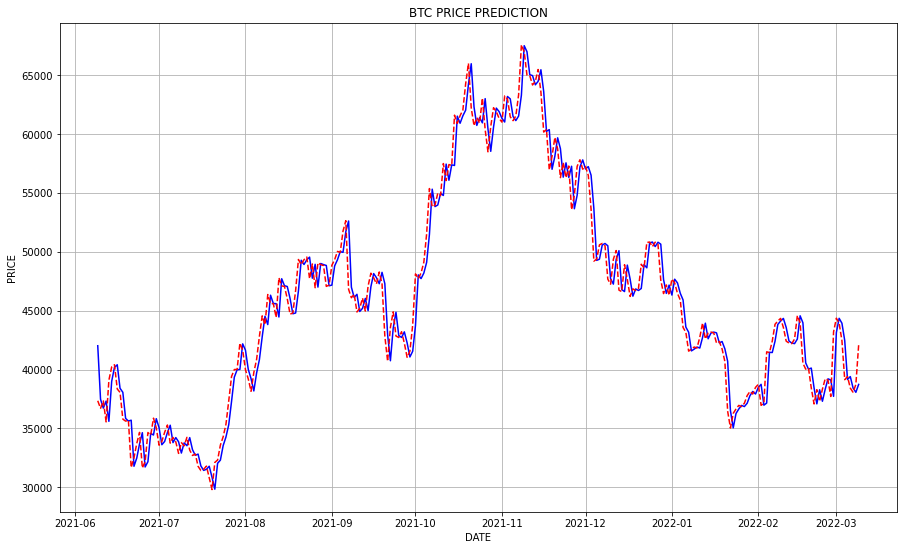

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_prediction=[]
for i in range(len(testing_data)):
  model=SARIMAX(training_data, order=(0,1,1))
  model_fit=model.fit()
  output= model_fit.forecast()
  yhat=((output[0]))
  model_prediction.append(yhat)
  actual_test_value=testing_data[i]
  #print(actual_test_value)
  training_data.append(actual_test_value)

print(model_fit.summary())

plt.figure(figsize=(15,9))
plt.grid(True)

date_range=df[to_row:].index

plt.plot(date_range, model_prediction[:], color='blue', linestyle='-', label="BTC PREDICTED PRICE")
plt.plot(date_range, testing_data, color='red', linestyle='dashed', label="BTC PREDICTED PRICE")

plt.title("BTC PRICE PREDICTION")
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.show()

In [34]:
!pip install pmdarima
from pmdarima.arima import auto_arima
step_wise=auto_arima(
    training_data,
    start_p=1,
    start_q=1,
    max_p=7,
    max_q=7,
    d=1,
    max_d=7,
    trace=True,
    m=12,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=49396.715, Time=7.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=49406.301, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=49406.807, Time=0.93 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=49407.171, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=49405.011, Time=0.06 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=49408.659, Time=6.67 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=49408.269, Time=5.45 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=49393.532, Time=10.32 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=49399.699, Time=8.81 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=33.05 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=49392.344, Time=18.62 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=49401.187, Time=16.28 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=49391.091, Time=10.65 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=49399.682, Time=3.39 sec
 ARIMA